<a href="https://colab.research.google.com/github/shubhamjha8090/Data-Analysis-In-Airbnb/blob/main/Copy_of_Copy_of_Airbnb_Bookings_Analysis_Shubham_Jha_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

## **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

%matplotlib inline
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %shell  %store  %sx  %system  %tb  %tensorflow_version  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%bigquery  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%perl 

## Mounting Google **Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing Dataset From Drive

In [ ]:
path = '/content/drive/MyDrive/uploaded files/Airbnb NYC 2019.csv'

In [ ]:
df = pd.read_csv(path)

## Let us explore the top 5 observation in the dataset to get a feel about what the data looks like and what are the columns we are dealing with.

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


 We can see that there are some NaN values in the last_review and reviews_per_month columns. We will look into the null values.

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
df.shape

(48895, 16)

 We can see that the price column has some irregularity as the minimum price of the apartment is 0 i.e Free stay?. We will have to make some Assumptions.

In [ ]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Missing values are present in the name, host_name, last_reviews and reviews_per_month columns.

## Now, we drop unnecessary columns such as latitude, longitude, last_review, reviews_per_month .

In [ ]:
# drop the unnecessary columns and making copy of data.
new_df = df.drop(['last_review', 'reviews_per_month','latitude','longitude'], axis = 1 )

In [ ]:
new_df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0


In [ ]:
new_df.shape

(48895, 12)

## Now, we drop rows with null values .

In [ ]:
# drop rows with null values.
new_df= new_df.dropna( how = 'any')


In [ ]:
new_df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
new_df.shape

(48858, 12)

Now we can see there is no null values present in our data set.

## Now let's deal with price column , price column has some irregularity as the minimum price of the apartment is 0 i.e Free stay?. We will have to make some Assumptions. 



In [ ]:
# checking rows where price is 'zero'.
new_df.loc[df['price'] <= 0][0:4]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
23161,18750597,"Huge Brooklyn Brownstone Living, Close to it all.",8993084,Kimberly,Brooklyn,Bedford-Stuyvesant,Private room,0,4,1,4,28
25433,20333471,★Hostel Style Room | Ideal Traveling Buddies★,131697576,Anisha,Bronx,East Morrisania,Private room,0,2,55,4,127
25634,20523843,"MARTIAL LOFT 3: REDEMPTION (upstairs, 2nd room)",15787004,Martial Loft,Brooklyn,Bushwick,Private room,0,2,16,5,0
25753,20608117,"Sunny, Quiet Room in Greenpoint",1641537,Lauren,Brooklyn,Greenpoint,Private room,0,2,12,2,0


In [ ]:
new_df.loc[df['price'] <= 0].shape

(11, 12)

11 properties have are having 0 price. Assuming this to be a mistake or error from the Airbnb side, we will replace all the 'zeros' with the 'Median price' to make data more Accurate.

In [ ]:
# now replace all the zeros in price with NaN.
new_df['price'] = new_df['price'].replace(0,np.nan)

In [ ]:
# Now fill the NaN values in price with 'Median price'.
new_df = new_df.fillna( value = df['price'].median())
new_df.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [ ]:
new_df['price'].min()

10.0

Now we have sucessfully replaced all rows having 0 price with the Median price

# 1: What can we learn about different hosts and areas?

In [ ]:
# neighbourhood_group relation with listed properties. 
neighbourhood = new_df['neighbourhood_group'].value_counts()
fig = plt.figure(figsize = (10, 5))

<Figure size 720x360 with 0 Axes>

Text(0.5, 0, 'Neighbourhood Group')

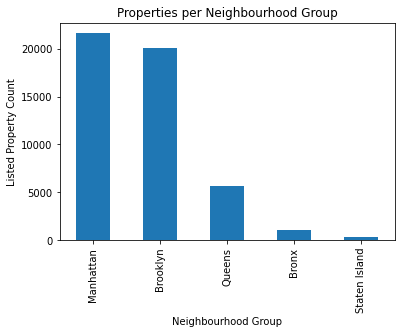

In [ ]:
# creating bar plot for neighbourhood_group.
neighbourhood.plot(kind = 'bar')

plt.title('Properties per Neighbourhood Group')
plt.ylabel('Listed Property Count')
plt.xlabel('Neighbourhood Group')

As we can see Most properties are located in Manhattan and Brooklyn.

In [ ]:
#host having highest number of properties listed.
highest_property_host = new_df.groupby([ 'host_name'])['host_id'].count().sort_values(ascending = False)[:10]
highest_property_host.reset_index()

,host_name,host_id
0,Michael,417
1,David,403
2,Sonder (NYC),327
3,John,294
4,Alex,279
5,Blueground,232
6,Sarah,227
7,Daniel,226
8,Jessica,205
9,Maria,204


Text(0.5, 1.0, 'Hosts having highest amount of properties listed')

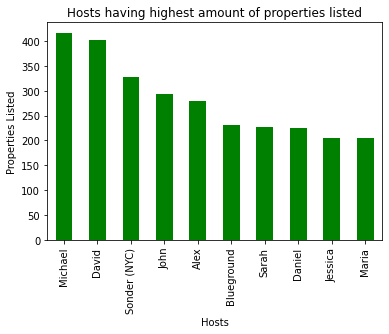

In [ ]:
# creating the bar plot
highest_property_host.plot(kind = 'bar', color = 'green')
plt.xlabel('Hosts')
plt.ylabel('Properties Listed')
plt.title('Hosts having highest amount of properties listed')

We can see that Sonder(NYC) has the highest number of listed Properties.

# 2:What can we learn from predictions? (ex: locations, prices, reviews, etc)

In [ ]:
# neighbourhood group relation with number of reviews. 
areas_reviews = new_df.groupby(['neighbourhood_group'])['number_of_reviews'].max().reset_index()
areas_reviews

,neighbourhood_group,number_of_reviews
0,Bronx,321
1,Brooklyn,488
2,Manhattan,607
3,Queens,629
4,Staten Island,333


In [ ]:
area = areas_reviews['neighbourhood_group']
review = areas_reviews['number_of_reviews']

Text(0.5, 1.0, 'Neighbourhood vs No of Reviews')

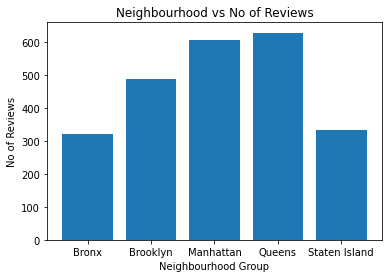

In [ ]:
# creating the bar plot
plt.bar(area , review)
plt.xlabel('Neighbourhood Group')
plt.ylabel('No of Reviews')
plt.title('Neighbourhood vs No of Reviews')

We can see that Queens has highest No of Reviews. but Manhattan has the highest no of properties listed.
This means that the number of properties listed on the Airbnb does not mean that the number of customers you will have will be more. 

In [ ]:
# price relation with no of reviews.
price_area = new_df.groupby(['price'])['number_of_reviews'].max().reset_index()
price_area.head(5)

,price,number_of_reviews
0,10.0,93
1,11.0,113
2,12.0,8
3,13.0,9
4,15.0,19


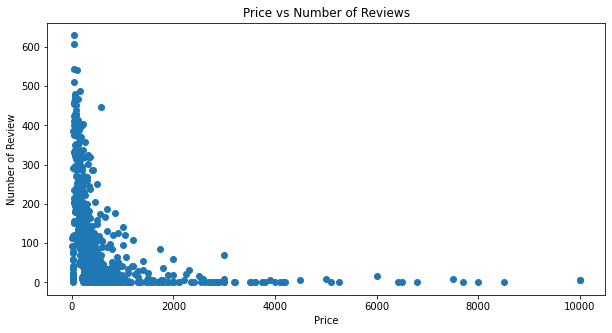

In [ ]:
area = price_area['price']
price = price_area['number_of_reviews']

fig = plt.figure(figsize = (10, 5))
 
# creating the scattter plot.
plt.scatter(area, price)
 
plt.xlabel("Price")
plt.ylabel("Number of Review")
plt.title("Price vs Number of Reviews")
plt.show()

Most of the properties price are between 0 - 2000. From the above Analysis we can say that most people prefer to stay in place where price is less.

In [ ]:
# Room Type relation with reviews.
room_type_review = new_df.groupby([ 'room_type'])['number_of_reviews'].max().reset_index()
room_type_review

,room_type,number_of_reviews
0,Entire home/apt,488
1,Private room,629
2,Shared room,454


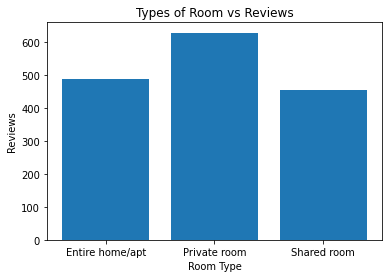

In [ ]:
# creating a bar plot.
room_type = room_type_review['room_type']
reviews = room_type_review['number_of_reviews']

plt.bar(room_type, reviews)
 
plt.xlabel("Room Type")
plt.ylabel("Reviews")
plt.title("Types of Room vs Reviews")
plt.show()

We can see from above analysis that people usually like to stay in  private room. thus it has highest no of Reviews.